## Credit Score Classification Analysis
## Student name: Yang 

A high-level overview of the project and process including:

a)  A  description of you data, the variables/features, and the question being addressed.

b)  A description of your analysis: what were you trying to do and why, and how did you achieve it.

c) A conclusion: What insight(s) into the original question did the model/analysis provide. Are there new questions or future work that the       analysis suggests? Were the results surprising or expected?

## General Intro:

- Bank has collected some info about their clients, together with their Credit Score: poor, standard, good.
- My goal is to predict a client's credit score based on current info.
- If the model works well, probably in the future we can avoid risk of poor credit score clients, or develop other credit service to high score customers.

## Data Info:

- 3-class **classification problem** - credit score: poor, standard, good.
- **Supervised training** - tried unsupervised ('cheat') - result is not even close.
- These 3 classes are **not imbalanced** - relatively ok.

## My Strategy:

- I transfered 3 groups : Good, Standard, and Poor, into **numeric** , so it is also can be dealt as **regression problem.**
- Maybe NOT a good idea since we CANNOT explain them with multiplication relationship - we can just try.
- **Data cleaning** - drop some unreasonable rows, also drop NaN.
- **Format improvement:** i.e. calculate years.
- **Scale the data** for numerical analysis.
- **Categorical analysis**, only with Occupation of Poor score - this project is more focused on quatitative analysis. 
- **Checked correlation** with Seaborn
- Tried **many reg/clf methods:**

  Linear Reg, OLS, Ridge, Logistic Reg, Random Forest, Boosting, Bagging, SMOTE, PCA, KNN, Decision Tree, Grid Research
  
  Also tried **Kmeans** to cluster but the result isn't close to the target, but we do successfully get 3 clusters - according to the diagnal.


## Summary

- Most important factors that related to Credit Score are: **Ourstanding Debt, Number of credit card, Interest Rate, and Number of payment.**
- Monthly balance, Amount invested monthly, and Credit usage ratio almost have **NOTHING** to do with an individual's Credit Score.
- Can HARDLY tell a person's Credit Score just based on his/her Occupation.
- Annual Income also irralevant - surprisingly.
- **Bagging Wins - with Score: 0.76!**
- **KNN also did a great job - with Score:0.72!**
- **Boosting is also ok - with Score: 0.71!**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 

In [2]:
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import precision_recall_curve

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Lets look at some basic info of the dataset.

In [4]:
train = pd.read_csv('train.csv')
print('train shape:', train.shape)
print('unique train ID',train['ID'].nunique())

train shape: (100000, 28)
unique train ID 100000


In [5]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


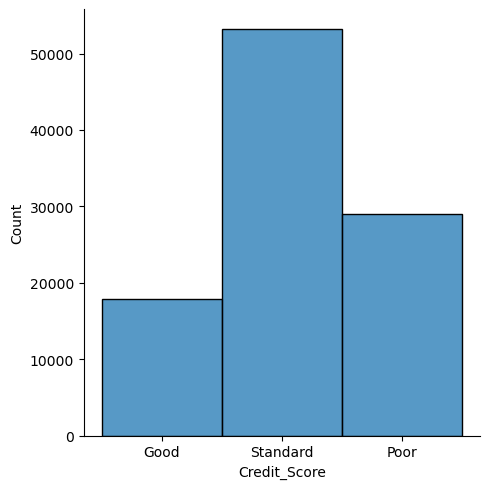

In [332]:
sns.displot(data=train['Credit_Score'])
plt.show()

- I'm curious that for the **'Poor' Credit_Score group**, how does the **occupation** look like?
- Turns out...it is uniform distributed.

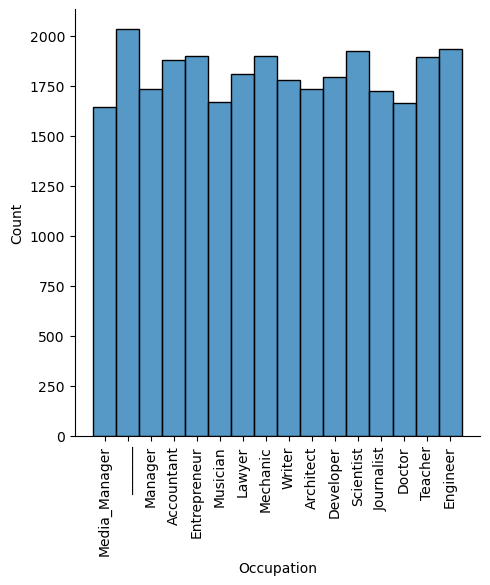

In [333]:
sns.displot(data=train['Occupation'][np.where(train['Credit_Score'] == 'Poor')[0]])
plt.xticks(rotation='vertical')
plt.show()

In [334]:
train['Credit_Score'].replace('Good', 3, inplace = True)
train['Credit_Score'].replace('Standard',2,inplace = True)
train['Credit_Score'].replace('Poor',1,inplace = True)
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,3
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,3
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,3
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,3


In [335]:
cl = ('Poor','Standard','Good')
uq = np.unique(train['Credit_Score'])
for i in range(len(cl)):
        print(cl[i] ,':', np.sum(train['Credit_Score']== uq[i]))
np.unique(train['Credit_Score'])

Poor : 28998
Standard : 53174
Good : 17828


array([1, 2, 3], dtype=int64)

- Now our target is clear: 3 unique classes: Poor, Standard, Good
- The target has been transformed to numeric expression: Poor = 1, Standard = 2, Good = 3. 


- we want to do some **quantitative analysis** , so let's just keep the numerical columns.
- ID, Customer_ID, SSN, Name...all look not that relavant, let's do not worry about them for now - **drop them**.

In [336]:
train.columns # check columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [337]:
tr = train[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 
           'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 
           'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 
           'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score']]

# only keep the useful columns

In [338]:
tr = tr.dropna()
tr.head() # drop all the NaN

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23,19114.12,1824.843333,3,4,3,4,3,7,4.0,809.98,26.822620,22 Years and 1 Months,80.41529543900253,312.49408867943663,3
6,23,19114.12,1824.843333,3,4,3,4,3,8_,4.0,809.98,22.537593,22 Years and 7 Months,178.3440674122349,244.5653167062043,3
8,28_,34847.84,3037.986667,2,4,6,1,3,4,2.0,605.03,24.464031,26 Years and 7 Months,104.291825168246,470.69062692529184,2
9,28,34847.84,3037.986667,2,4,6,1,7,1,2.0,605.03,38.550848,26 Years and 8 Months,40.39123782853101,484.5912142650067,3
10,28,34847.84_,3037.986667,2,1385,6,1,3,-1,2.0,605.03,33.224951,26 Years and 9 Months,58.51597569589465,466.46647639764313,2


In [339]:
tr['Credit_History_Age'][0] 

# This info is pretty useful, let's reform it

'22 Years and 1 Months'

In [340]:
def to_yr(row):
    x = row['Credit_History_Age'].split(" ")
    return (int(x[0]) + float(x[3])/12)

# write a calculation function

In [341]:
tr['Credit_Age']=tr.apply(to_yr,axis=1)
tr[['Credit_History_Age','Credit_Age']].head()

,Credit_History_Age,Credit_Age
0,22 Years and 1 Months,22.083333
6,22 Years and 7 Months,22.583333
8,26 Years and 7 Months,26.583333
9,26 Years and 8 Months,26.666667
10,26 Years and 9 Months,26.750000


In [342]:
tr = tr.drop('Credit_History_Age', axis = 1)

# drop the original Credit_History_Age

In [343]:
def remove(age):
    if '_' in str(age):
        return age.strip('_')
    return age

# remove '_'

In [344]:
tr.insert(15,'Credit_Score',tr.pop('Credit_Score')) 

# change position

In [345]:
len(tr.columns.tolist()[:-1])

# Now we have 15 columns as 'independant variable'

15

In [346]:
for i in (tr.columns.tolist()[:-1]):
    tr[i] = tr[i].apply(remove)
    tr[i] = pd.to_numeric(tr[i], errors ='coerce')
tr.shape

(66548, 16)

In [347]:
tr.dtypes

# double check the datatype to ensure they are all numerical type

Age                           int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Num_Credit_Inquiries        float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Amount_invested_monthly     float64
Monthly_Balance             float64
Credit_Age                  float64
Credit_Score                  int64
dtype: object

In [348]:
tr.describe()

# Let's now check the statistic summary, see if there is any unreasonable crazy numbers.

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Amount_invested_monthly,Monthly_Balance,Credit_Age,Credit_Score
count,66548.000000,6.654800e+04,66548.000000,66548.000000,66548.000000,66548.000000,66548.000000,66548.000000,66548.000000,66548.000000,66548.000000,66548.000000,66548.000000,6.654800e+04,66548.000000,66548.000000
mean,112.071888,1.777368e+05,4159.459379,16.820821,22.737062,74.248512,3.068312,21.075795,30.874632,26.841768,1424.072312,32.326985,630.544230,-3.005350e+22,18.453693,1.886578
std,691.173342,1.442855e+06,3169.832543,115.944290,129.653002,473.917077,63.084627,14.844908,225.540600,188.601464,1151.480771,5.103979,2044.015850,3.164977e+24,8.294905,0.673634
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,0.000000,0.230000,20.881250,0.000000,-3.333333e+26,0.083333,1.000000
25%,24.000000,1.937048e+04,1621.365000,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,3.000000,568.810000,28.106185,73.618139,2.700002e+02,12.083333,1.000000
50%,33.000000,3.696352e+04,3059.780000,6.000000,6.000000,14.000000,3.000000,18.000000,14.000000,6.000000,1164.585000,32.362993,134.180933,3.363962e+02,18.333333,2.000000
75%,42.000000,7.225236e+04,5912.965000,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,9.000000,1941.950000,36.526196,258.736785,4.700576e+02,25.166667,2.000000
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5797.000000,1485.000000,67.000000,4397.000000,2594.000000,4998.070000,50.000000,10000.000000,1.602041e+03,33.666667,3.000000


- We notice that there are some **unreasonable numbers** to be droped:

   i.e. **age** cannot be negative, also unlikely to reach over 100. Or, **time of changed/delay** also cannot be negative, etc. 

- Let's do some **data cleaning**, again, to get rid of unreasonable numbers - just based on my personal understanding.

In [349]:
tr = tr.drop(tr[(tr['Age'] < 14)].index)
tr = tr.drop(tr[(tr['Age'] > 100)].index)

# Maybe child under 14 is not allowed to have credit card.
# Assume all the users are under 100 yr old.

In [350]:
tr = tr.drop(tr[(tr['Num_Bank_Accounts'] < 0)].index)
tr = tr.drop(tr[(tr['Num_Bank_Accounts'] > 20)].index)

# Dont think anyone can have over 20 bankaccounts - just my guess tho.

In [351]:
tr = tr.drop(tr[(tr['Num_Credit_Card'] > 20)].index)

# Who can have more than 20 credit cards?! Let's just drop them - again - just my guess.

In [352]:
tr = tr.drop(tr[(tr['Interest_Rate'] > 20)].index)

# 

In [353]:
tr = tr.drop(tr[(tr['Num_of_Loan'] < 0)].index)
tr = tr.drop(tr[(tr['Num_of_Loan'] > 20)].index)

In [354]:
tr = tr.drop(tr[(tr['Delay_from_due_date'] < 0)].index)

In [355]:
tr = tr.drop(tr[(tr['Num_of_Delayed_Payment'] < 0)].index)
tr = tr.drop(tr[(tr['Num_of_Delayed_Payment'] > 20)].index)

In [356]:
tr = tr.drop(tr[(tr['Num_Credit_Inquiries'] > 20)].index)

In [357]:
tr.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Amount_invested_monthly,Monthly_Balance,Credit_Age,Credit_Score
0,23,19114.12,1824.843333,3,4,3,4,3,7,4.0,809.98,26.822620,80.415295,312.494089,22.083333,3
6,23,19114.12,1824.843333,3,4,3,4,3,8,4.0,809.98,22.537593,178.344067,244.565317,22.583333,3
8,28,34847.84,3037.986667,2,4,6,1,3,4,2.0,605.03,24.464031,104.291825,470.690627,26.583333,2
9,28,34847.84,3037.986667,2,4,6,1,7,1,2.0,605.03,38.550848,40.391238,484.591214,26.666667,3
12,28,34847.84,3037.986667,2,4,6,1,3,1,2.0,605.03,34.977895,130.115420,444.867032,26.916667,3


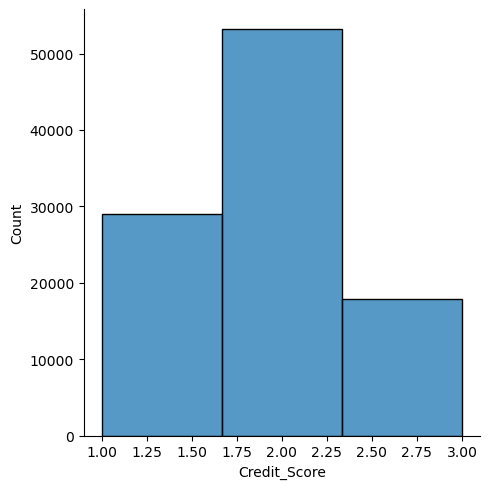

In [358]:
sns.displot(data=train['Credit_Score'], bins = 3)
plt.show()

In [359]:
tr['Credit_Score'].describe

<bound method NDFrame.describe of 0        3
6        3
8        2
9        3
12       3
        ..
99983    3
99994    1
99995    1
99996    1
99999    1
Name: Credit_Score, Length: 40734, dtype: int64>

In [360]:
np.sum(tr['Credit_Score']==3)

9335

In [361]:
X=tr.drop('Credit_Score',axis=1)
y=tr['Credit_Score']

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=5)

In [363]:
np.isinf(X_train).all()

Age                         False
Annual_Income               False
Monthly_Inhand_Salary       False
Num_Bank_Accounts           False
Num_Credit_Card             False
Interest_Rate               False
Num_of_Loan                 False
Delay_from_due_date         False
Num_of_Delayed_Payment      False
Num_Credit_Inquiries        False
Outstanding_Debt            False
Credit_Utilization_Ratio    False
Amount_invested_monthly     False
Monthly_Balance             False
Credit_Age                  False
dtype: bool

In [364]:
tr.isna().sum()

Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Age                  0
Credit_Score                0
dtype: int64

In [367]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

# scale the data

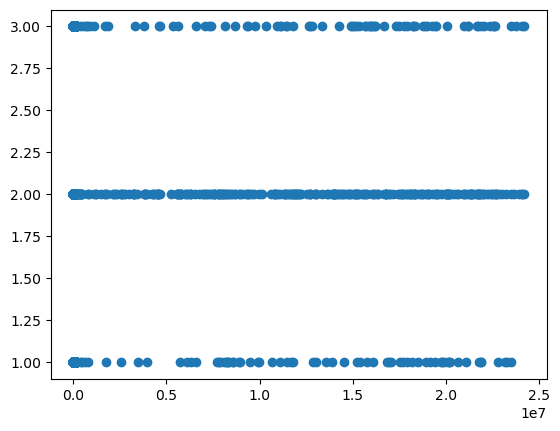

In [366]:
plt.scatter(x = tr['Annual_Income'], y = tr['Credit_Score'])
plt.show()

## Linear Reg gogogo

- NOT a good choice according to score.

In [39]:
from sklearn import linear_model

In [40]:
ols_reg = linear_model.LinearRegression().fit(X_train_s,y_train)
ols_reg.score(X_train_s, y_train).round(3)

0.18

## OLS gogogo

- OLS is NOT a good choice according to R_square.

In [258]:
preds="+".join(tr.columns[i] for i in range(len(tr.columns)-1)) 
preds

'Age+Annual_Income+Monthly_Inhand_Salary+Num_Bank_Accounts+Num_Credit_Card+Interest_Rate+Num_of_Loan+Delay_from_due_date+Num_of_Delayed_Payment+Num_Credit_Inquiries+Outstanding_Debt+Credit_Utilization_Ratio+Amount_invested_monthly+Monthly_Balance+Credit_Age'

In [42]:
ols_tr=ols(formula='Credit_Score~' + preds,data=tr).fit()
ols_tr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Credit_Score   R-squared:                     -10.853
Model:                            OLS   Adj. R-squared:                -10.853
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 07 May 2023   Prob (F-statistic):                nan
Time:                        21:27:59   Log-Likelihood:                -89080.
No. Observations:               40734   AIC:                         1.782e+05
Df Residuals:                   40733   BIC:                         1.782e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   1.8e-53   8.68e-54      2.075      0.038    9.97e-55     3.5e-53
Age                               0          0        nan        nan           0           0
Annual_Income             8.958e-49   4.32e-49      2.075      0.038    4.96e-50    1.74e-48
Monthly_Inhand_Salary     7.605e-50   3.67e-50      2.075      0.038    4.21e-51    1.48e-49
Num_Bank_Accounts          5.76e-53   2.78e-53      2.075      0.038    3.19e-54    1.12e-52
Num_Credit_Card            8.64e-53   4.16e-53      2.075      0.038    4.78e-54    1.68e-52
Interest_Rate             1.872e-52   9.02e-53      2.075      0.038    1.04e-53    3.64e-52
Num_of_Loan                5.76e-53   2.78e-53      2.075      0.038    3.19e-54    1.12e-52
Delay_from_due_date       2.124e-52   1.02e-52      2.075      0.038    1.18e-53    4.13e-52
Num_of_Delayed_Payment    1.296e-52   6.25e-53      2.075      0.038    7.18e-54    2.52e-52
Num_Credit_Inquiries      1.044e-52   5.03e-53      2.075      0.038    5.78e-54    2.03e-52
Outstanding_Debt            1.3e-50   6.26e-51      2.075      0.038     7.2e-52    2.53e-50
Credit_Utilization_Ratio  6.338e-52   3.05e-52      2.075      0.038    3.51e-53    1.23e-51
Amount_invested_monthly   4.496e-51   2.17e-51      2.075      0.038    2.49e-52    8.74e-51
Monthly_Balance              -6e-27   2.89e-27     -2.075      0.038   -1.17e-26   -3.32e-28
Credit_Age                4.176e-52   2.01e-52      2.075      0.038    2.31e-53    8.12e-52
==============================================================================
Omnibus:                      600.367   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              359.166
Skew:                          -0.050   Prob(JB):                     1.02e-78
Kurtosis:                       2.551   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Ridge gogogo
- Same score as Linear Regression, only 0.18, NOT a good choice.

In [43]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV # help you chose
from sklearn.metrics import mean_squared_error

In [44]:
lambdas = 10**np.linspace(5,-3,100)
ridgecv = RidgeCV(alphas = lambdas, scoring = 'neg_mean_squared_error', normalize = True,cv=5)
ridgecv.fit(X_train_s, y_train)

RidgeCV(alphas=array([1.00000000e+05, 8.30217568e+04, 6.89261210e+04, 5.72236766e+04,
       4.75081016e+04, 3.94420606e+04, 3.27454916e+04, 2.71858824e+04,
       2.25701972e+04, 1.87381742e+04, 1.55567614e+04, 1.29154967e+04,
       1.07226722e+04, 8.90215085e+03, 7.39072203e+03, 6.13590727e+03,
       5.09413801e+03, 4.22924287e+03, 3.51119173e+03, 2.91505306e+03,
       2.42012826e+03, 2.00923300e+0...
       3.43046929e-02, 2.84803587e-02, 2.36448941e-02, 1.96304065e-02,
       1.62975083e-02, 1.35304777e-02, 1.12332403e-02, 9.32603347e-03,
       7.74263683e-03, 6.42807312e-03, 5.33669923e-03, 4.43062146e-03,
       3.67837977e-03, 3.05385551e-03, 2.53536449e-03, 2.10490414e-03,
       1.74752840e-03, 1.45082878e-03, 1.20450354e-03, 1.00000000e-03]),
        cv=5, normalize=True, scoring='neg_mean_squared_error')

In [45]:
ridgecv.alpha_

0.013530477745798047

In [46]:
ridgecv.score(X_train_s,y_train).round(5)

0.18038

## Logistic Regression gogogo

- General accuracy **0.64**, **pretty good!**
- If we look at **F1**, for 'Poor':0.25. 'Standard':0.76, 'Good': 0.46 !

In [309]:
from sklearn.linear_model import LogisticRegression

In [48]:
clf = LogisticRegression(random_state=0)
LRclf = clf.fit(X_train_s, y_train)
train_results = cross_validate(LRclf, X_train_s, y_train, cv=5,scoring='accuracy')
train_results['test_score'].round(2)

array([0.65, 0.64, 0.65, 0.64, 0.65])

In [49]:
test_results = cross_validate(LRclf, X_test_s, y_test, cv=5,scoring='accuracy')
test_results['test_score'].round(2)

# Now try on TEST dataset!

array([0.65, 0.64, 0.65, 0.64, 0.64])

In [50]:
pd.crosstab(y_test,LRclf.predict(X_test_s),rownames=['Target'],colnames=['Predicted'])

Predicted,1,2,3
Target,,,
1,325,1575,177
2,195,6427,702
3,9,1694,1117


In [51]:
print(classification_report(y_test,LRclf.predict(X_test_s)))

              precision    recall  f1-score   support

           1       0.61      0.16      0.25      2077
           2       0.66      0.88      0.76      7324
           3       0.56      0.40      0.46      2820

    accuracy                           0.64     12221
   macro avg       0.61      0.48      0.49     12221
weighted avg       0.63      0.64      0.60     12221



## RF gogogo

- Random forest is **pretty good** on test set, with **OOB 0.64** and **accurancy 0.63.**
- F1 score for 'Standard' is 0.76, relatively high enough. 

In [52]:
rf = RandomForestClassifier(n_estimators=600,max_depth=3, oob_score=True,max_features='sqrt',random_state=0).fit(X_train_s,y_train)

In [53]:
accuracy_score(rf.predict(X_test_s),y_test)

0.6332542345143606

In [54]:
rf.oob_score_

0.6407252832041525

In [55]:
pd.crosstab(y_test,rf.predict(X_test_s),rownames=['Target'],colnames=['Predicted'])

Predicted,1,2,3
Target,,,
1,182,1895,0
2,102,7064,158
3,3,2324,493


In [56]:
print(classification_report(y_test,rf.predict(X_test_s)))

              precision    recall  f1-score   support

           1       0.63      0.09      0.15      2077
           2       0.63      0.96      0.76      7324
           3       0.76      0.17      0.28      2820

    accuracy                           0.63     12221
   macro avg       0.67      0.41      0.40     12221
weighted avg       0.66      0.63      0.55     12221



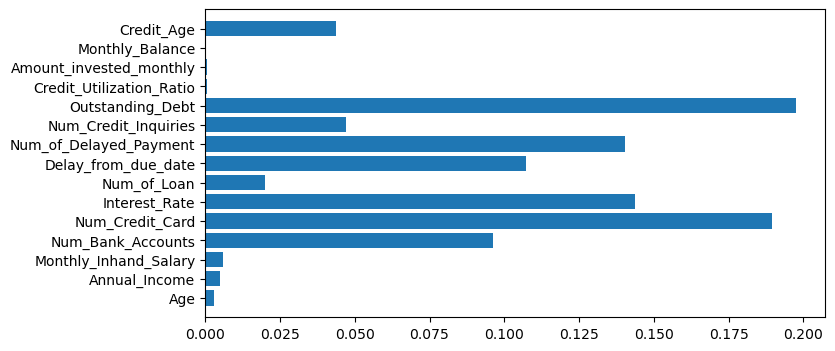

In [57]:
plt.figure(figsize=(8,4))
nfeat=X.shape[1]
plt.barh(np.arange(nfeat),rf.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X.columns))
plt.ylim(-1,nfeat)
plt.show()

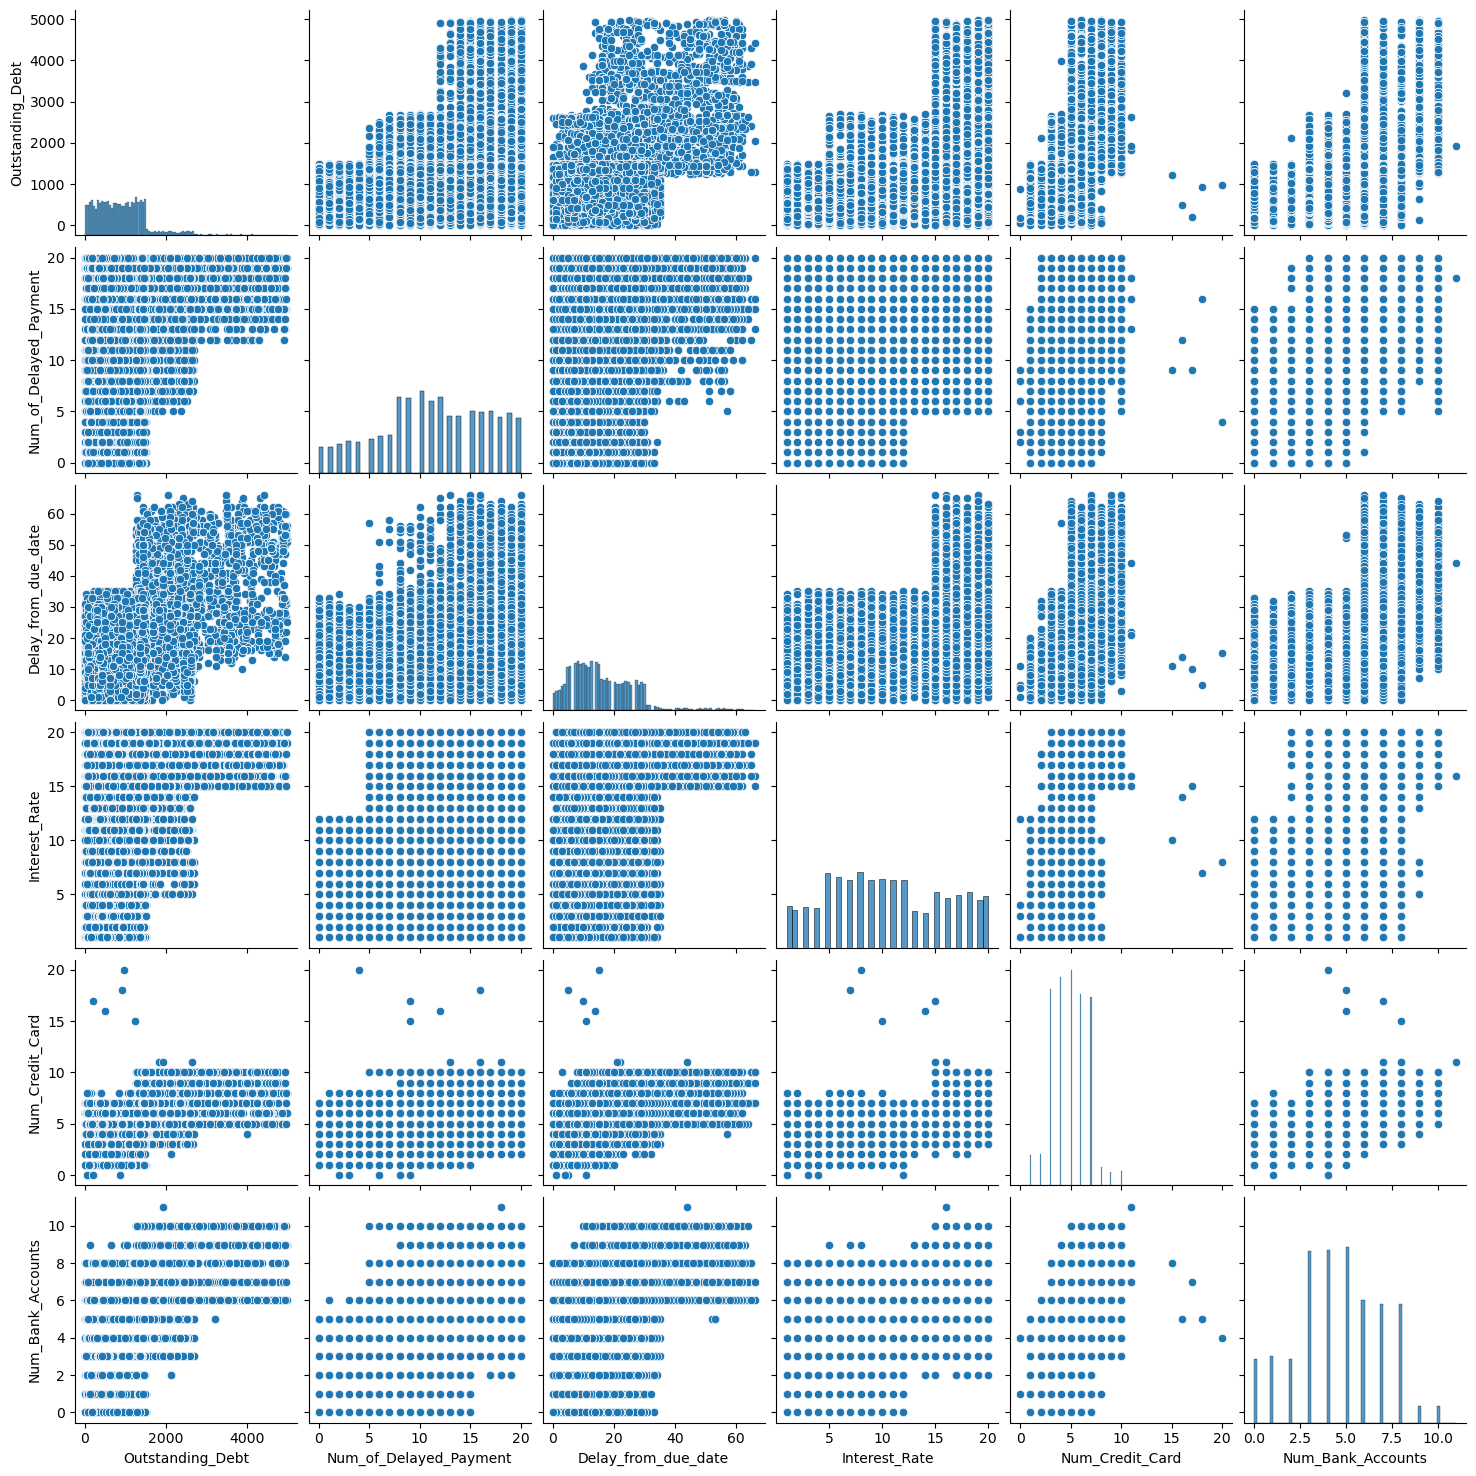

In [58]:
sns.pairplot(tr[['Outstanding_Debt','Num_of_Delayed_Payment','Delay_from_due_date','Interest_Rate','Num_Credit_Card','Num_Bank_Accounts']])

# Check correlationship between those 'factors' that really matters according to above 'feature importances report'

## Boosting gogogo

- Can be a bit slow here...
- WOW, **accuracy score 0.71!** and F1 scores are all higher than Random Forest! **Awesome!**

In [59]:
bclf = GradientBoostingClassifier(n_estimators=600,max_depth=5,learning_rate=0.1,random_state=0).fit(X_train_s,y_train)

In [60]:
accuracy_score(bclf.predict(X_test_s),y_test)

0.7068979625235251

In [61]:
pd.crosstab(y_test,bclf.predict(X_test_s),rownames=['Target'],colnames=['Predicted'])

Predicted,1,2,3
Target,,,
1,945,942,190
2,373,6143,808
3,44,1225,1551


In [62]:
print(classification_report(y_test,bclf.predict(X_test_s)))

              precision    recall  f1-score   support

           1       0.69      0.45      0.55      2077
           2       0.74      0.84      0.79      7324
           3       0.61      0.55      0.58      2820

    accuracy                           0.71     12221
   macro avg       0.68      0.61      0.64     12221
weighted avg       0.70      0.71      0.70     12221



## Bagging gogogo

- Can be pretty slow...
- What?! **Bagging is even better** than Boosting - **accuracy score hits 0.76!** F1 are all even higher than Boosting - **Incredible !**

In [63]:
bg= BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=400,random_state=0, oob_score=True,).fit(X_train_s, y_train)

In [64]:
bg.score(X_test_s,y_test)

0.7610670157924884

In [65]:
pd.crosstab(y_test,bg.predict(X_test_s),rownames=['Target'],colnames=['Predicted'])

Predicted,1,2,3
Target,,,
1,1228,788,61
2,435,6279,610
3,33,993,1794


In [66]:
print(classification_report(y_test,bg.predict(X_test_s)))

              precision    recall  f1-score   support

           1       0.72      0.59      0.65      2077
           2       0.78      0.86      0.82      7324
           3       0.73      0.64      0.68      2820

    accuracy                           0.76     12221
   macro avg       0.74      0.69      0.72     12221
weighted avg       0.76      0.76      0.76     12221



## With SMOTE - make it more balanced

- Errrr...for some reason the scores **become worse**. Let's forget about it.

In [67]:
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

In [68]:
oversample = SMOTE()
Xs, ys = oversample.fit_resample(X_train_s, y_train)

In [69]:
bs_clf = GradientBoostingClassifier(n_estimators=600,max_depth=3,learning_rate=0.1,random_state=0).fit(Xs,ys)
print(classification_report(y_test,bs_clf.predict(X_test_s)))

              precision    recall  f1-score   support

           1       0.29      0.69      0.41      2077
           2       0.88      0.00      0.00      7324
           3       0.34      0.87      0.49      2820

    accuracy                           0.32     12221
   macro avg       0.50      0.52      0.30     12221
weighted avg       0.65      0.32      0.18     12221



In [70]:
bg_clf= BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=400,random_state=0, oob_score=True,).fit(Xs, ys)
print(classification_report(y_test,bg_clf.predict(X_test_s)))

              precision    recall  f1-score   support

           1       0.54      0.73      0.62      2077
           2       0.86      0.60      0.70      7324
           3       0.54      0.82      0.65      2820

    accuracy                           0.67     12221
   macro avg       0.64      0.72      0.66     12221
weighted avg       0.73      0.67      0.68     12221



## PCA gogogo

- Only 0.17? This is **terrible...**

In [71]:
pca = PCA(10).fit(X_train_s)
 # project to 2 dimensions
pca_tr = pca.transform(X_train_s)

pca_tr.shape

(28513, 10)

In [72]:
pca_tst=pca.transform(X_test_s)
pca_mod = LinearRegression().fit(pca_tr[:,0:10],y_train)
np.round(pca_mod.score(pca_tst[:,0:10], y_test),2)

0.17

## KNN CLF gogogo

- Really slow when use cross validation.
- I've tried several numbers of 'K'. In the simple 'for loop' when K is 1, the score reaches peak at **0.7195**, which is **GOOD!**

In [73]:
# cvres=[]
# for i in range(10,50):
#     clf = KNeighborsClassifier(n_neighbors=i)
#     nn = cross_validate(clf, X_train_s, y_train, cv=5, scoring='accuracy')
#     cvres.append(nn['test_score'].mean())
    
# trying to choose the best 'K'

In [74]:
# plt.figure(figsize=(6, 4))
# plt.plot(list(range(1,51)),cvres)
# plt.title('KNN Classifier')
# plt.xlabel('neighbors')
# plt.ylabel('Accuracy')
# plt.show()

In [75]:
score = []
for i in range(1, 35):
    kclf = KNeighborsClassifier(n_neighbors= i)
    nb=kclf.fit(X_train_s,y_train)
    score.append(np.round(accuracy_score(nb.predict(X_test_s),y_test),5))

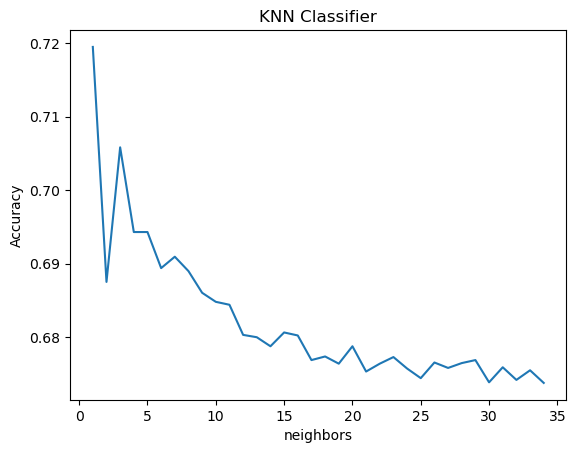

In [76]:
plt.plot(list(range(1,35)),score)
plt.title('KNN Classifier')
plt.xlabel('neighbors')
plt.ylabel('Accuracy')
plt.show()

In [77]:
np.argmax(score)

0

In [78]:
kclf_do = KNeighborsClassifier(n_neighbors= np.argmax(score)+1)
nb_do=kclf_do.fit(X_train_s,y_train)
np.round(accuracy_score(nb_do.predict(X_test_s),y_test),5)

0.7195

In [79]:
print(classification_report(y_test,kclf_do.predict(X_test_s)))

              precision    recall  f1-score   support

           1       0.62      0.60      0.61      2077
           2       0.78      0.78      0.78      7324
           3       0.64      0.64      0.64      2820

    accuracy                           0.72     12221
   macro avg       0.68      0.68      0.68     12221
weighted avg       0.72      0.72      0.72     12221



## Tree gogogo

- This is super slow now...
- I have the code below.
- Manually found the best Alpha should be around 0.00012, give a pretty **nice score: 0.7!**

In [80]:
# single_tree_clf = DecisionTreeClassifier(random_state=0)
# path = single_tree_clf.cost_complexity_pruning_path(X_train_s, y_train)
# ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [81]:
# cvres=[]
# for a in ccp_alphas:
#     st_clf = DecisionTreeClassifier(random_state=0, ccp_alpha= a)
#     cvclf = cross_validate(st_clf, X_train_s, y_train, cv=5, scoring='accuracy')
#     cvres.append(cvclf['test_score'].mean())

In [82]:
# al=ccp_alphas[np.argmax(cvres)]

In [83]:
# DTclf = DecisionTreeClassifier(random_state=0, ccp_alpha=al).fit(X_train_s,y_train)
# DTclf.score(X_test_s,y_test)

- **THIS IS TOO SLOW**
- I will just try some alphas...

In [84]:
DTclf0 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0045).fit(X_train_s,y_train)
DTclf0.score(X_test_s,y_test)

0.638654774568366

In [85]:
DTclf1 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.002).fit(X_train_s,y_train)
DTclf1.score(X_test_s,y_test)

0.673103674003764

In [86]:
DTclf2 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0001).fit(X_train_s,y_train)
DTclf2.score(X_test_s,y_test)

0.6996972424515179

In [87]:
DTclf3 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.00012).fit(X_train_s,y_train)
DTclf3.score(X_test_s,y_test)

0.7027248179363391

In [88]:
pd.crosstab(y_test,DTclf3.predict(X_test_s),rownames=['Target'],colnames=['Predicted'])

Predicted,1,2,3
Target,,,
1,1087,818,172
2,574,5940,810
3,128,1131,1561


In [89]:
print(classification_report(y_test,DTclf3.predict(X_test_s)))

              precision    recall  f1-score   support

           1       0.61      0.52      0.56      2077
           2       0.75      0.81      0.78      7324
           3       0.61      0.55      0.58      2820

    accuracy                           0.70     12221
   macro avg       0.66      0.63      0.64     12221
weighted avg       0.70      0.70      0.70     12221



## GridSearch gogogo

- It takes 30min to run this...
- Accuracy is just 0.362, too bad...strange

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [44]:
parameters = {'learning_rate':[0.1,0.01], 'n_estimators':[500,600],'max_depth':[4,5,6]}

In [45]:
bmod = GradientBoostingRegressor(random_state=0)

In [46]:
boost_regr = GridSearchCV(bmod, parameters)
boost_regr.fit(X_train_s, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [4, 5, 6],
                         'n_estimators': [500, 600]})

In [47]:
df=pd.DataFrame.from_dict(boost_regr.cv_results_)

In [48]:
df[df['mean_test_score']==df['mean_test_score'].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,69.208754,2.429413,0.075905,0.010818,0.1,6,600,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.431925,0.438933,0.451757,0.446545,0.429955,0.439823,0.008345,1


In [49]:
best_breg = GradientBoostingRegressor(random_state=0,learning_rate=0.1,n_estimators=600,max_depth=6).fit(X_train_s,y_train)
np.round(best_breg.score(X_test_s,y_test),3)

0.362

## Kmeans - unsupervised method

- Target has 3 groups: Good, Standard, Poor, However, from Kmeans we can't tell which is which, but we can check the crosstab.
- It is hard to just put custmers into 3 groups correctly based on our 'factors' provided in the train dataset.

In [38]:
kmeans = KMeans(n_clusters=3,random_state=0).fit(X_train_s)

In [39]:
for i in range(0,3):
    print(i+1,":",(kmeans.labels_==i).sum())

1 : 14184
2 : 3435
3 : 10894


In [40]:
for i in range(1,4):
    print(i,':' , (y_train == i).sum())

1 : 4712
2 : 17286
3 : 6515


In [41]:
pd.crosstab(kmeans.labels_,y_train)

Credit_Score,1,2,3
row_0,,,
0,1300,11204,1680
1,1778,1558,99
2,1634,4524,4736


In [368]:
tr['Credit_Score'] = np.where(tr['Credit_Score'] ==(2 | 1), 1, 0)
np.sum(tr['Credit_Score'] == 1), tr.shape

(9335, (40734, 16))

## Now, all the good =1, mid-low = 0

- Let's try several models, then we find random forest is the best.
- Change threshold to 0.65 - we **want precise 'Good' credit_score, eliminate false positive,** so we can better target our customer, sell them more financial derivatives products.

In [393]:
X=tr.drop('Credit_Score',axis=1)
y=tr['Credit_Score']

In [394]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.3, random_state=5)

In [395]:
X_train_s1 = scaler.fit_transform(X_train1)
X_test_s1 = scaler.fit_transform(X_test1)

## Dummy gogogo

In [396]:
from sklearn.dummy import DummyClassifier

In [397]:
dum_maj=DummyClassifier(strategy='most_frequent').fit(X_train_s1,y_train1)

In [398]:
dum_maj.score(X_test_s1,y_test1) 

0.769249652237951

## Tree gogogo

In [399]:
Treeclf = DecisionTreeClassifier(max_depth=4,random_state=0).fit(X_train_s1,y_train1)

In [400]:
Treeclf.score(X_test_s1,y_test1)

0.7964978316013419

## Random Forest gogogo WOW - 0.862 !

In [401]:
rf = RandomForestClassifier(n_estimators=400,max_features='sqrt',random_state=0).fit(X_train_s1,y_train1)

In [402]:
accuracy_score(rf.predict(X_test_s1),y_test1) # wow pretty high in general

0.8620407495294984

## Bagging gogogo 

In [403]:
bag= BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=400,random_state=0, oob_score=True,).fit(X_train_s1, y_train1)

In [404]:
bag.score(X_test_s1,y_test1)

0.861467964978316

## Boosting gogogo

In [405]:
bclf2= GradientBoostingClassifier(n_estimators=600,max_depth=5,learning_rate=0.1,random_state=0).fit(X_train_s1,y_train1)

In [406]:
accuracy_score(bclf2.predict(X_test_s1),y_test1)

0.8195728663775469

## KNN gogogo

In [378]:
score = []
for i in range(1, 35):
    kclf = KNeighborsClassifier(n_neighbors= i)
    nb=kclf.fit(X_train_s,y_train)
    score.append(np.round(accuracy_score(nb.predict(X_test_s1),y_test1),5))

In [382]:
kclf_2 = KNeighborsClassifier(n_neighbors= np.argmax(score)+1)
nb_2=kclf_2.fit(X_train_s1,y_train)
np.round(accuracy_score(nb_2.predict(X_test_s1),y_test1),5)

0.7195

## Let's just focus on Random Forest since it did a great job

In [418]:
new_rfc_pred = rf.predict_proba(X_test_s1)[:,1] > .65

- with regular 0.5 threshold

In [422]:
pd.crosstab(y_test1,rf.predict(X_test_s1),rownames=['Target'],colnames=['Predicted'])

# threshold = 0.5

Predicted,0,1
Target,,
0,8952,449
1,1237,1583


- with new 0.65 threshold, we AVOID catching 'Good' credit score that are actually mid-low score.
- we ONLY want the real 'GOOD' to seel them more financial derivatives products.

In [423]:
pd.crosstab(y_test1,new_rfc_pred,rownames=['Target'],colnames=["Predicted"])

# threshold = 0.65

Predicted,False,True
Target,,
0,9191,210
1,1977,843


## Let's check different threshold.

In [424]:
from sklearn.metrics import precision_recall_curve

In [425]:
precision, recall, thresholds = precision_recall_curve(y_test1,rf.predict_proba(X_test_s1)[:,1])

In [426]:
newpt=np.argmin(np.abs(thresholds-0.65))

In [428]:
pt=np.argmin(np.abs(thresholds-0.5))

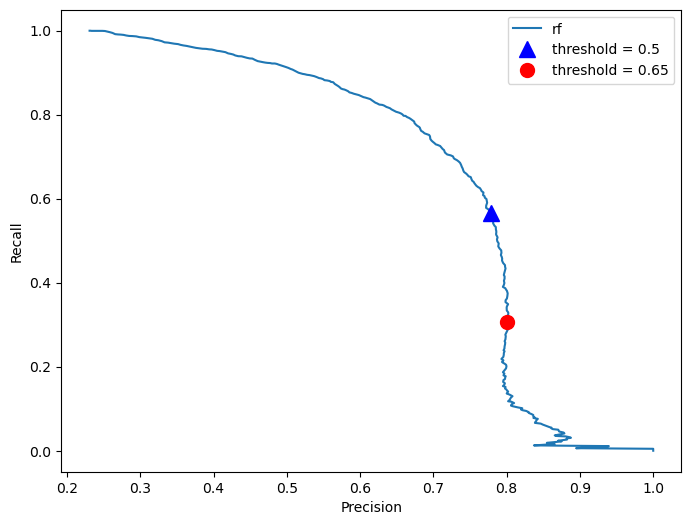

In [429]:
plt.figure(figsize=(8,6))
plt.plot(precision,recall,label='rf')
plt.plot(precision[pt],recall[pt],'^',c='b',markersize=12, label = 'threshold = 0.5') 
plt.plot(precision[newpt],recall[newpt],'o',c='r',markersize=10, label = 'threshold = 0.65')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()
plt.show()

- almost same precision (TP/(TP + FP))
- recall(TP/Real Pos) is different: 0.5 threshold is better.
- with threshold = 0.65, we do reduced False Positive - we dont want the mid-low credit_score people be predicted as good score - so we are being strict by set the threshold higher.
- after all it all depends on the strategy. Are we going to promote the high risk product to more people or we want to eliminate those mid-low credit score people as much as we can and only focus on certain people. 
- I'll probably stick with the threshold = 0.5 solution. 

## Thank you!